In [2]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten,Dropout,BatchNormalization,Activation
from  keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.constraints import maxnorm
from keras.utils import np_utils
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from mlxtend.plotting import plot_confusion_matrix
import streamlit as st
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics, svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn .preprocessing import normalize


In [3]:
neural=pd.read_csv('heart_failure_clinical_records_dataset.csv')


In [4]:
neural.head()
##sex : 1 male and 0 female 
## smoking :0 no smoking and 1 smoking 

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
neural.info

<bound method DataFrame.info of       age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_

In [6]:
neural.shape

(299, 13)

In [7]:
neural.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [8]:
##visualize the data 

## plot correlation matrix
## correlation matrix
corr_matrix = neural.corr()
corr_matrix

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


<AxesSubplot: >

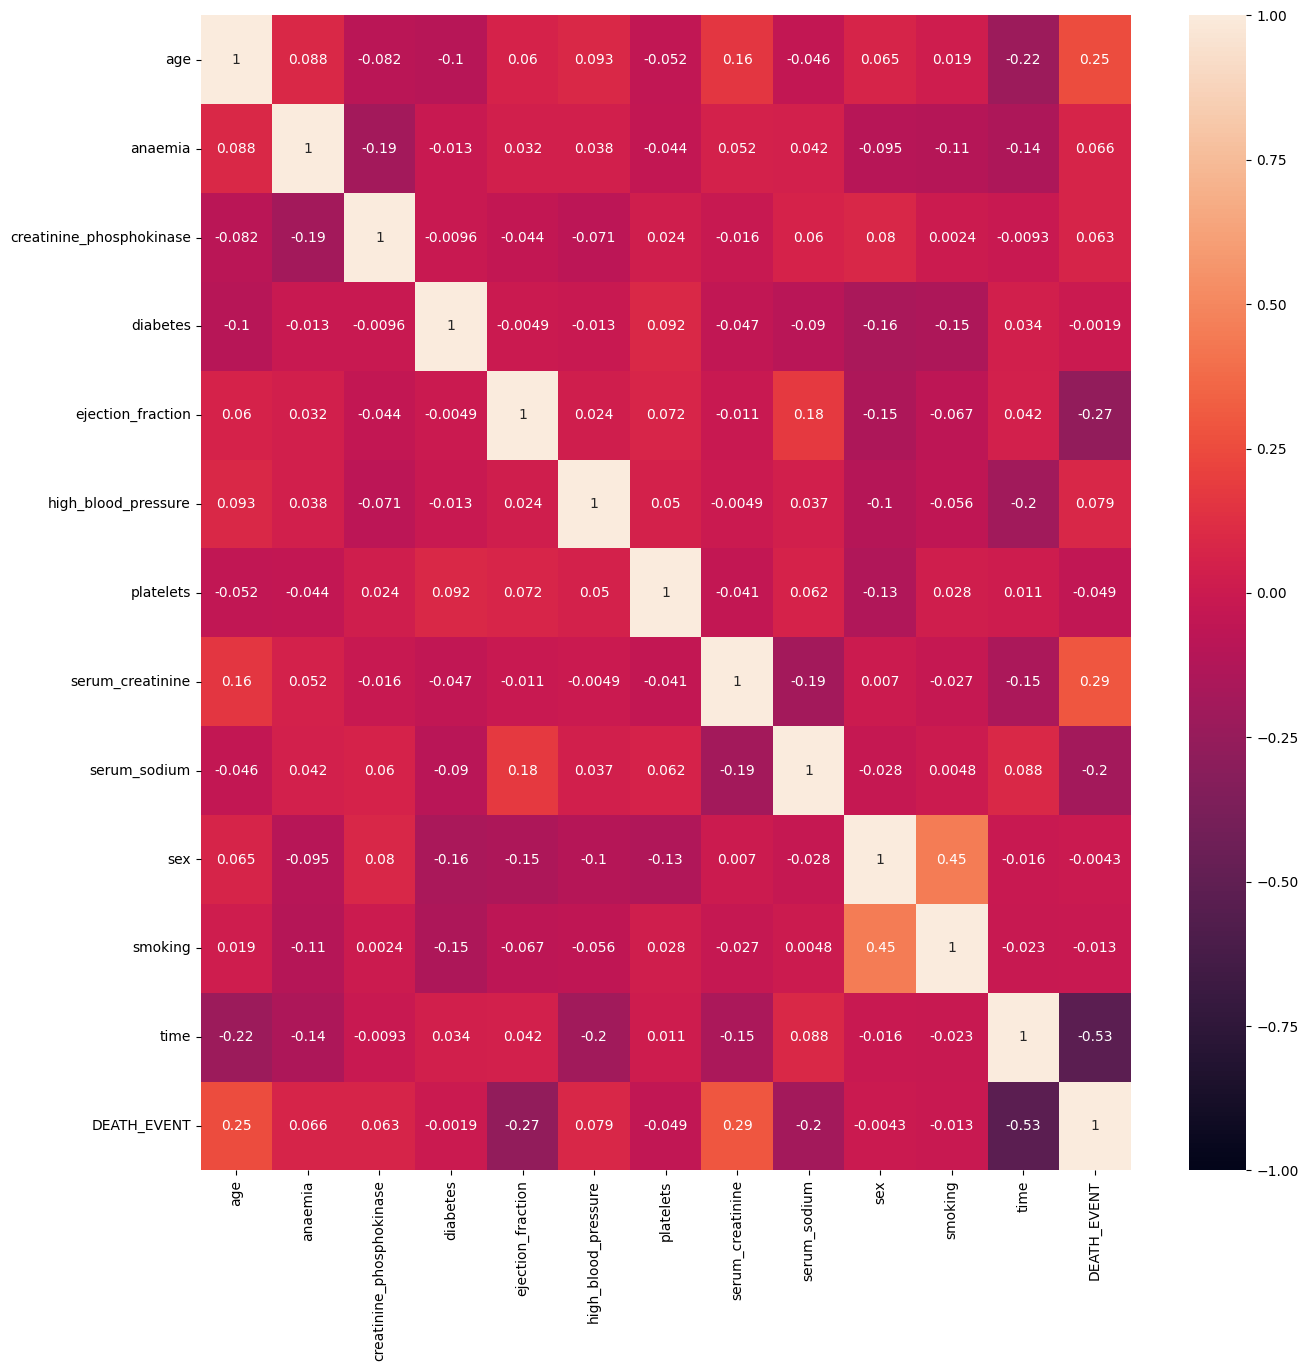

In [9]:
##visualize the data 
## heatmap
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1)

In [ ]:
###serum creatinine , ejection fraction, age , time have higher correlation

C:\Users\brill\AppData\Local\Temp\ipykernel_16904\1901517958.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(neural["DEATH_EVENT"])


<AxesSubplot: xlabel='DEATH_EVENT', ylabel='Density'>

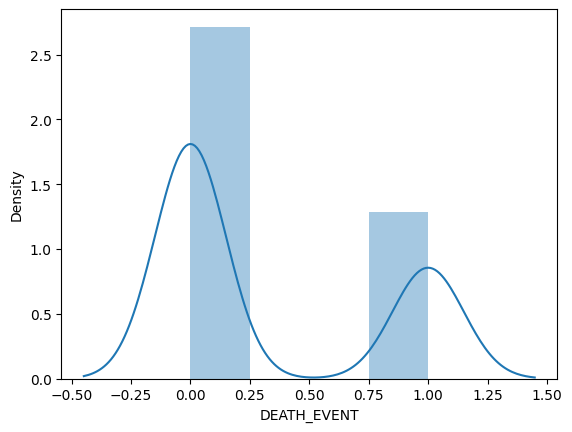

In [5]:
sns.distplot(neural["DEATH_EVENT"])

C:\Users\brill\AppData\Local\Temp\ipykernel_16904\495891477.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(neural["age"])


<AxesSubplot: xlabel='age', ylabel='Density'>

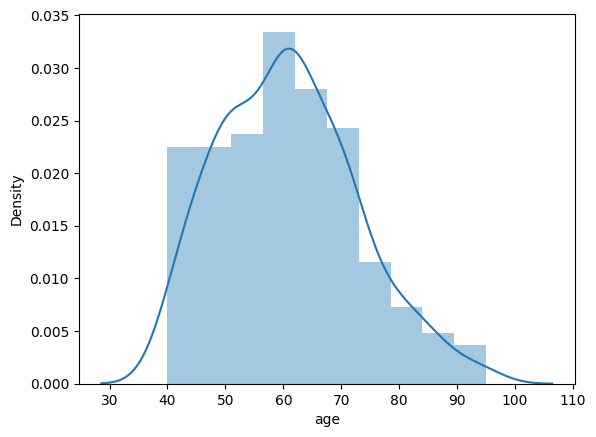

In [6]:
sns.distplot(neural["age"])

<AxesSubplot: xlabel='age', ylabel='diabetes'>

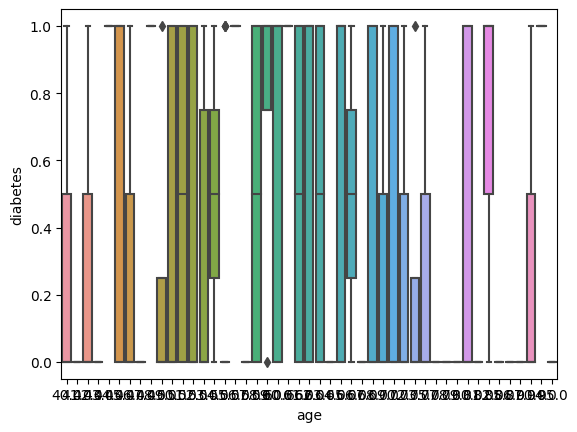

In [10]:
sns.boxplot(x="age", y="diabetes", data=neural)

<AxesSubplot: ylabel='age'>

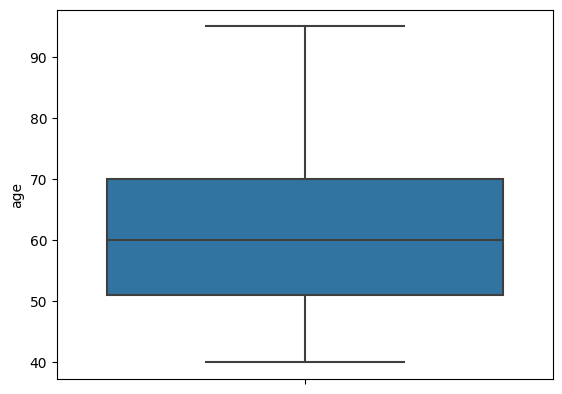

In [11]:
###How to remove outliers
sns.boxplot(y="age",data=neural)
##we can see there are not outliers. but we will remove as a demonstration
##mean is 60 here 

<AxesSubplot: >

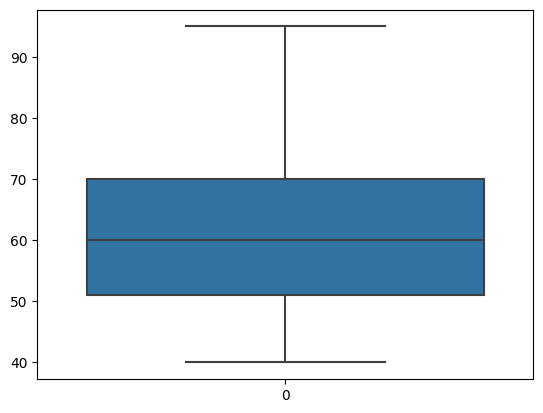

In [19]:
sns.boxplot(neural["age"])

In [12]:
neural["age"].mean()

60.83389297658862

In [14]:
##neural1=neural[neural["age"] <100]

<AxesSubplot: ylabel='age'>

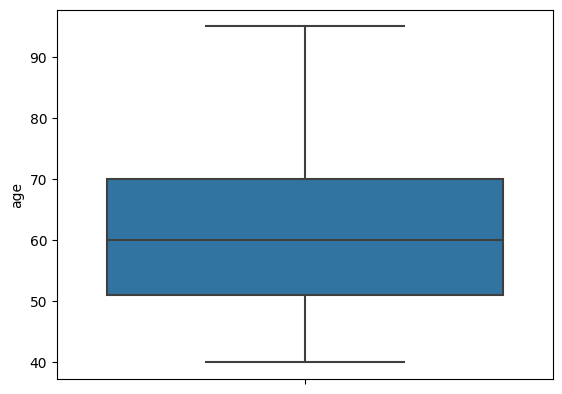

In [15]:
##sns.boxplot(y="age",data=neural1)

In [16]:
##neural1["age"].mean()

60.83389297658862

In [21]:
neural["platelets"].describe()
###first quartile 25%
##second quartile 50% 
## third quartile 75%
##we can see that there is an outlier situation when the max value 850000 is far from the third quuartile 303500
##we can check when the minimum value is far from the first quartile 25% also


count       299.000000
mean     263358.029264
std       97804.236869
min       25100.000000
25%      212500.000000
50%      262000.000000
75%      303500.000000
max      850000.000000
Name: platelets, dtype: float64

In [29]:
neural1=neural[(neural.platelets>212500)]##because below 212500 there are outliers
##because mayor 303500 there are outilers because the maximum is 850000

<AxesSubplot: >

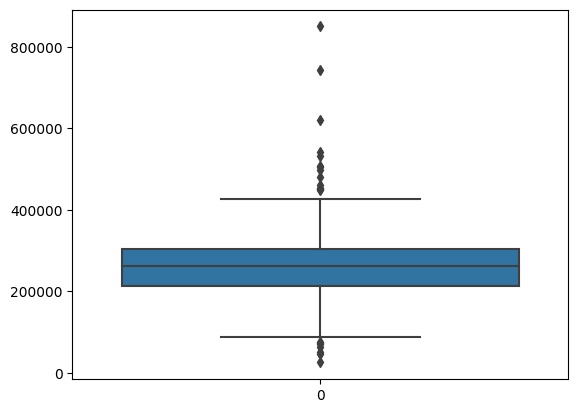

In [30]:
sns.boxplot(neural["platelets"])

<AxesSubplot: >

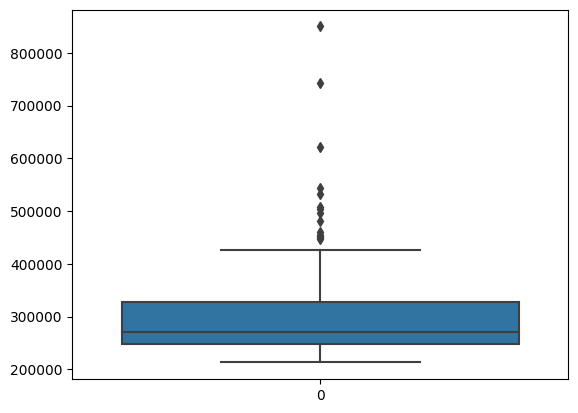

In [31]:
sns.boxplot(neural1["platelets"])

In [38]:
def plotvariable(neural,variable):
    plt.figure(figsize=(16,4))
    ##histogram
    plt.subplot(1,2,1)
    plt.hist(neural[variable],alpha=0.5)
    ##boxplot
    plt.subplot(1,2,2)
    sns.boxplot(neural[variable])
    plt.show()


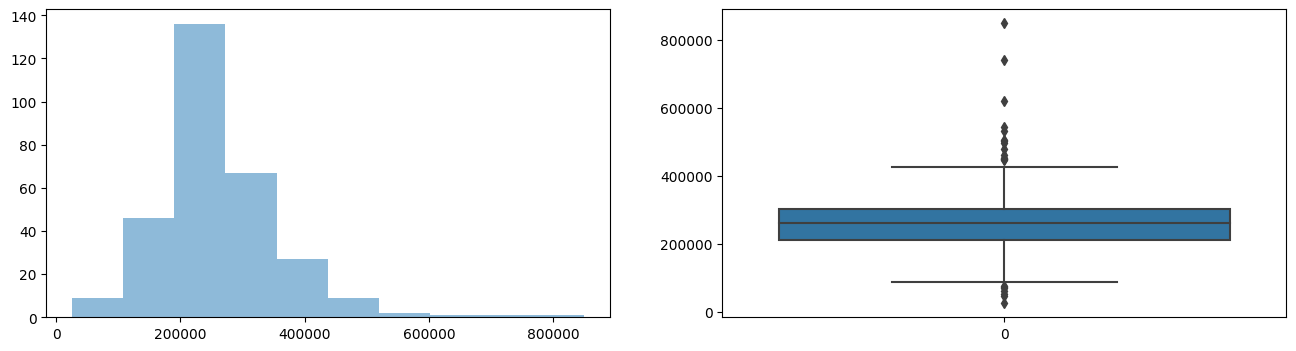

In [39]:
plotvariable(neural, "platelets")
### there are outilers some of the relations are all grouped mostly in one side like between 0 to 40000
##few are 8000000 which are higher in magnitude so this indicates outlier.
##the line in the middle is the medium and the first line around 20000 is the 25% percentile and the other around 30000 is the 75%

###anything going above 40000000 line represents outliers

In [ ]:
##Q1 =25% 25th percentile 
##Q3=75% 75th percentile
##IQR= Q3-Q1

In [43]:
def find_boundaries(df, variables):
    Q1 =neural[variables].quantile(.25)
    Q3=neural[variables].quantile(.75)
    IQR =Q3-  Q1
    lower_boundy=Q1 -1.5*IQR
    upper_boundry=Q3 + 1.5*IQR
    return lower_boundy, upper_boundry

In [44]:
lower_platelets,upper_platelets = find_boundaries(neural,"platelets")
print('upper limit for platelets are is' , upper_platelets)
print("lower limit for platelets is" , lower_platelets)

upper limit for platelets are is 440000.0
lower limit for platelets is 76000.0


In [46]:
#####remove /trimming 
### remove whatever is beyon 444000 and whatever is below 760000
##capping capping replaces an observation for example 50000000 which is beyond 44000000 will replace it with 4400000
outliers_platelets=np.where(neural["platelets"]) > upper_platelets,True,
np.where(neural["platelets"]< lower_platelets, True, False)



array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [ ]:
###df_platelets =  neural.loc[~ ("outliers_platelets"),]##this does not work
##not working for removing

In [57]:
##capping
neural["platelets"] =np.where(neural["platelets"]> upper_platelets,upper_platelets,
                              np.where(neural["platelets"]< lower_platelets,lower_platelets, neural["platelets"]))


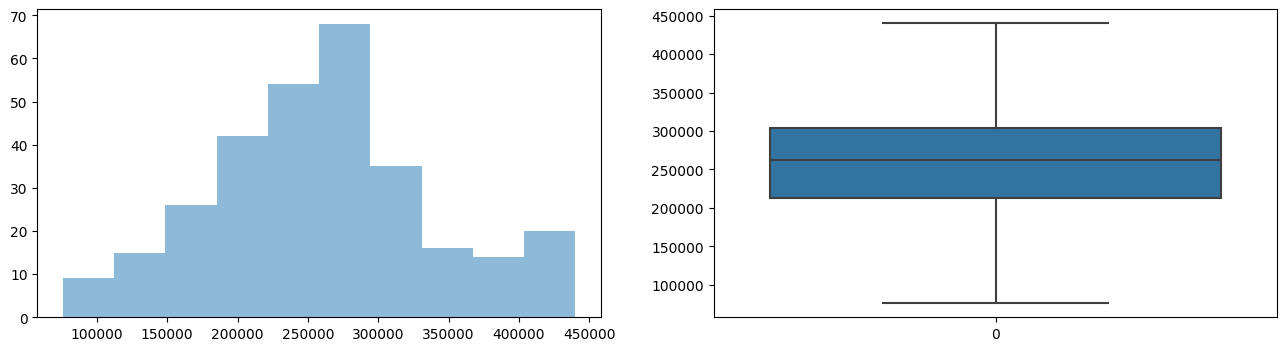

In [58]:
plotvariable(neural,"platelets")

In [65]:
###removing outlier IQR 
##platelets 
Q1 = neural.platelets.quantile(0.25)
Q3 =neural.platelets.quantile(0.75)
Q1,Q3

(212500.0, 303500.0)

In [66]:
IQR =Q3 -Q1
IQR

91000.0

In [67]:
lower_limit =Q1 -1.5*IQR
upper_limit = Q3  + 1.5*IQR
lower_limit, upper_limit

(76000.0, 440000.0)

In [73]:
nee=neural[(neural.platelets>lower_limit)& (neural.platelets<upper_limit)]
###print(nee)

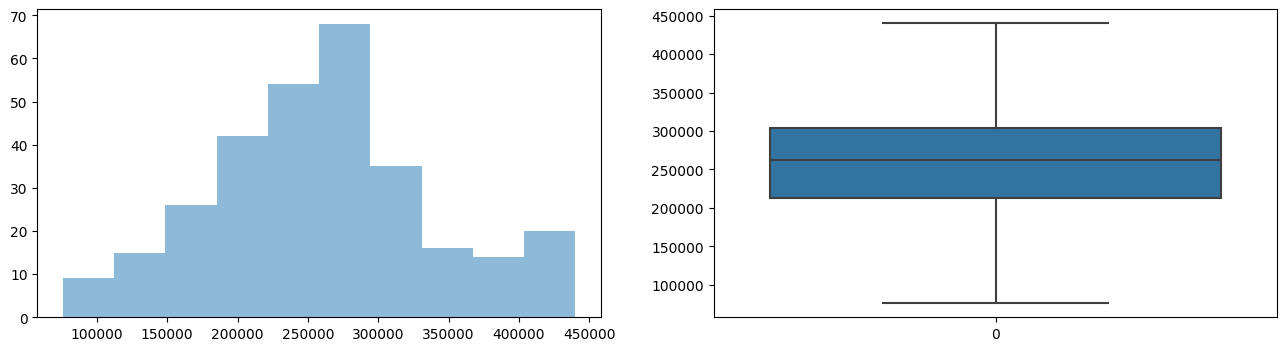

In [74]:
plotvariable(neural,"platelets")

In [76]:
nee.head(3)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1


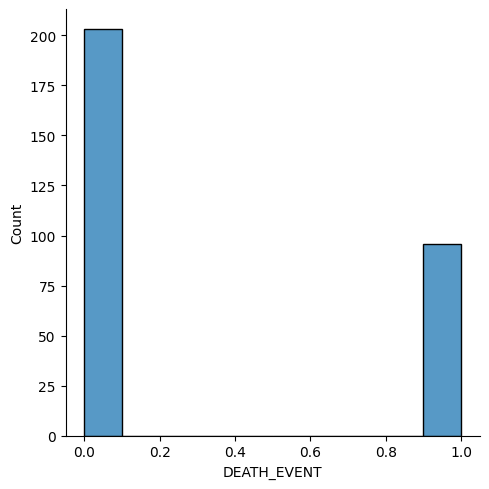

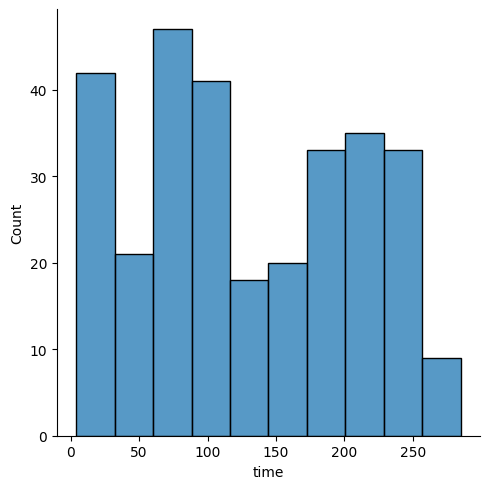

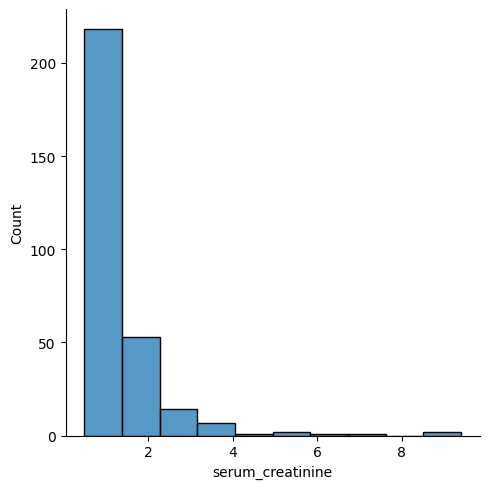

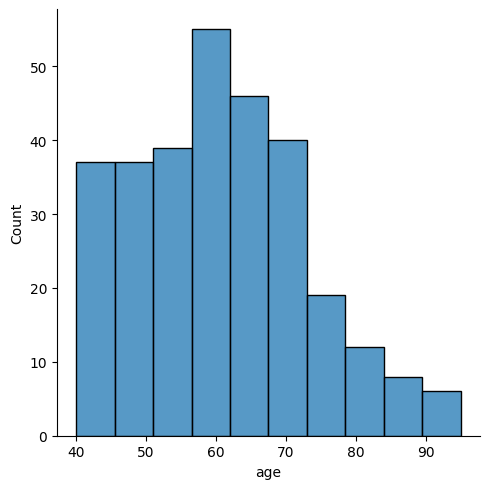

In [90]:
sns.displot(neural['DEATH_EVENT'],bins=10,kde=False)
sns.displot(neural['time'],bins=10,kde=False)
sns.displot(neural['serum_creatinine'],bins=10,kde=False)

sns.displot(neural['age'],bins=10,kde=False)

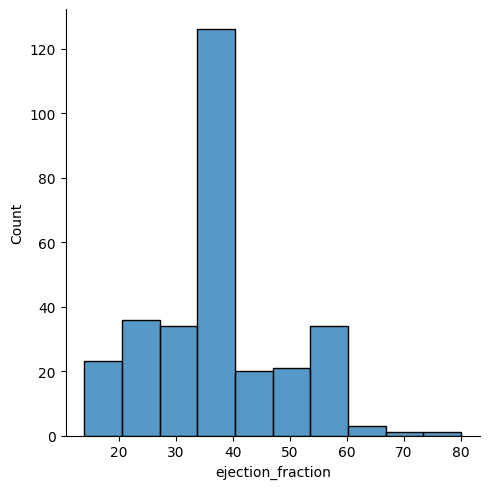

In [4]:
sns.displot(neural['ejection_fraction'],bins=10,kde=False)

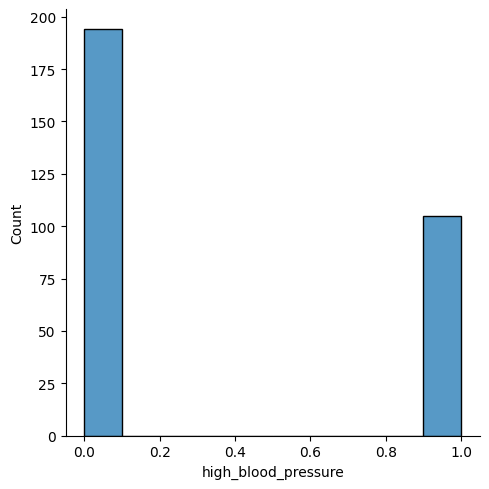

In [9]:
sns.displot(neural['high_blood_pressure'],bins=10,kde=False)

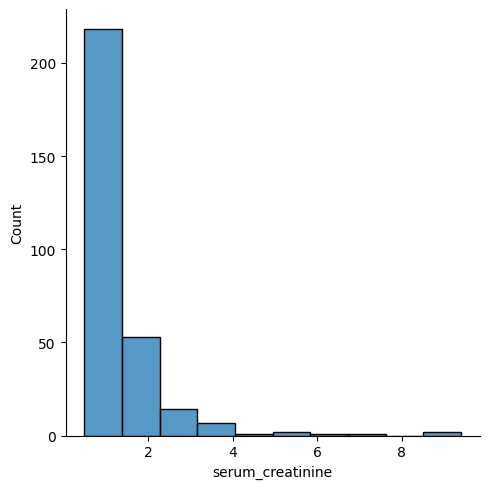

In [10]:
sns.displot(neural['serum_creatinine'],bins=10,kde=False)

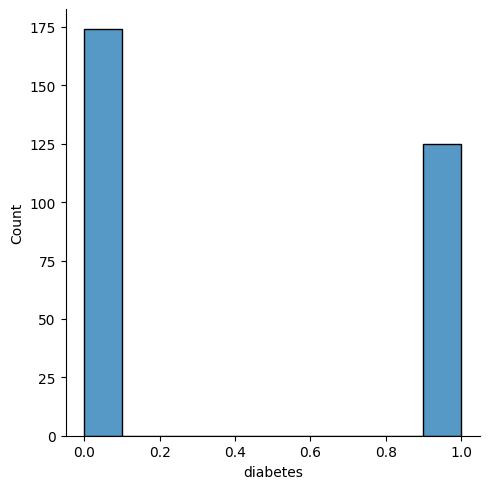

In [5]:
sns.displot(neural['diabetes'],bins=10,kde=False)

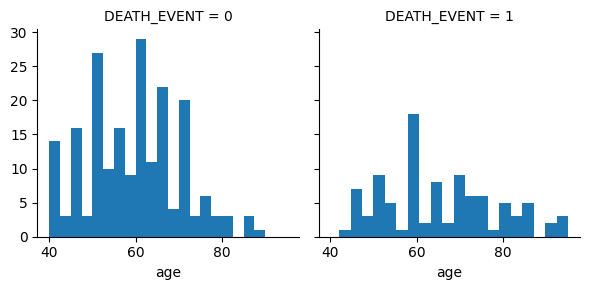

In [91]:
n= sns.FacetGrid(neural, col='DEATH_EVENT')
n.map(plt.hist, 'age', bins=20)

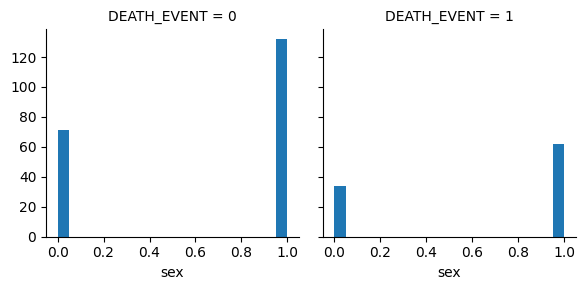

In [92]:
n= sns.FacetGrid(neural, col='DEATH_EVENT')
n.map(plt.hist, 'sex', bins=20)

c:\Users\brill\OneDrive\Desktop\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\brill\OneDrive\Desktop\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


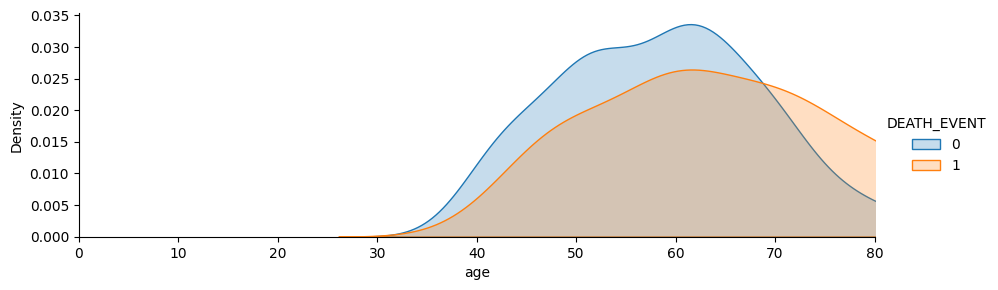

In [93]:
neural_event = sns.FacetGrid(neural, hue = 'DEATH_EVENT', aspect = 3)
neural_event.map(sns.kdeplot,'volatile acidity', shade=True)
neural_event.set(xlim=(0,80))
neural_event.add_legend()
plt.show()

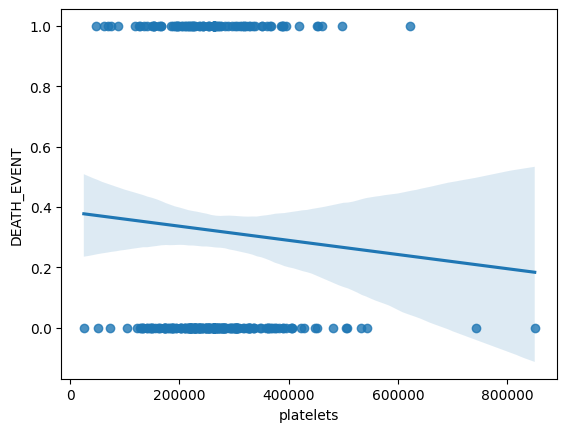

In [94]:
sns.regplot(x='platelets', y = 'DEATH_EVENT', data=neural)
plt.show()

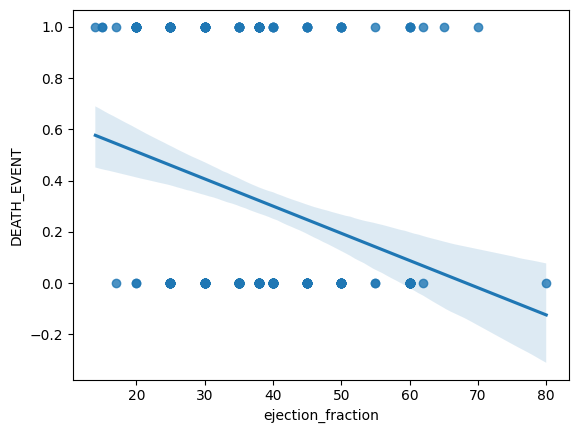

In [95]:
sns.regplot(x='ejection_fraction', y = 'DEATH_EVENT', data=neural)
plt.show()
###normal ejection fraction is more than 50% 

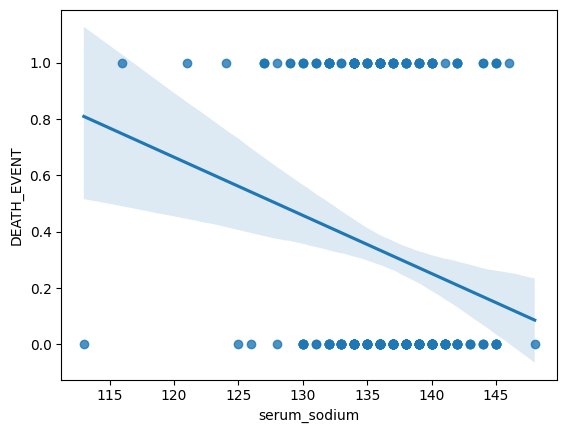

In [96]:
sns.regplot(x='serum_sodium', y = 'DEATH_EVENT', data=neural)
plt.show()
##normal range for serum sodium from 135 to 145

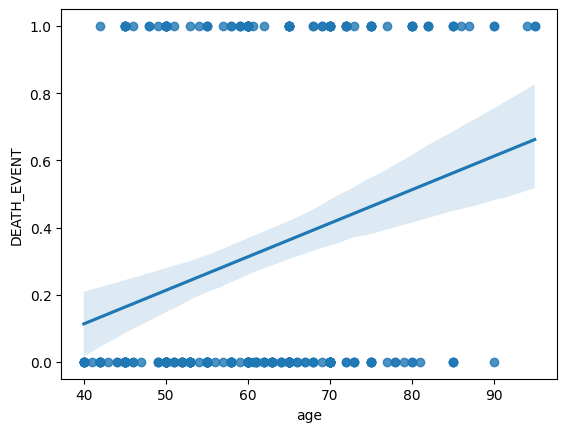

In [97]:
sns.regplot(x='age', y = 'DEATH_EVENT', data=neural)
plt.show()

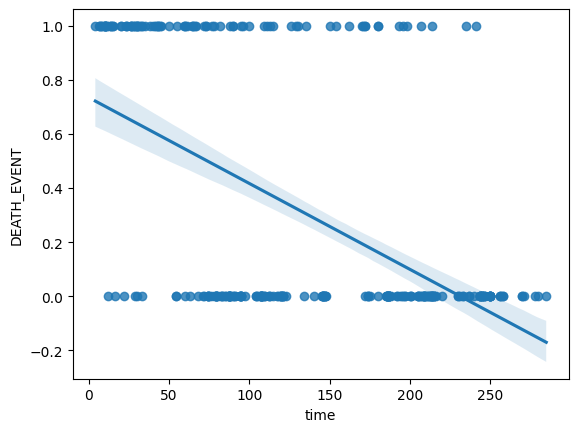

In [11]:
sns.regplot(x='time', y = 'DEATH_EVENT', data=neural)
plt.show()

<AxesSubplot: xlabel='age', ylabel='DEATH_EVENT'>

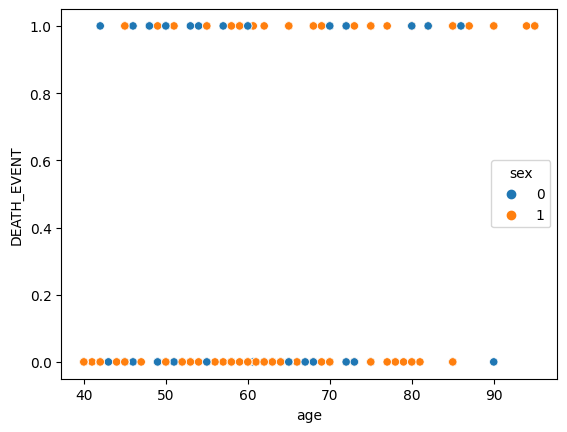

In [98]:
sns.scatterplot(x= neural["age"], y= neural["DEATH_EVENT"], hue= neural['sex'])

<AxesSubplot: xlabel='ejection_fraction', ylabel='DEATH_EVENT'>

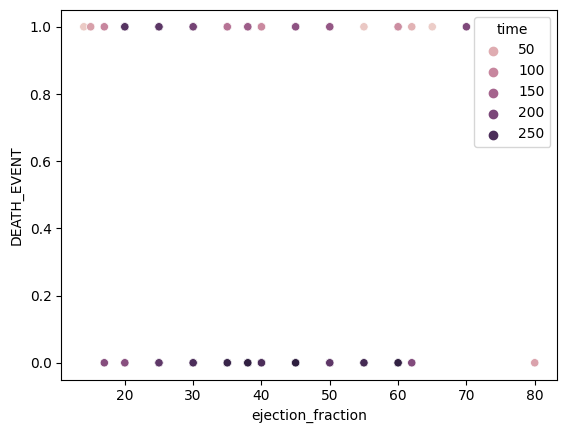

In [12]:
sns.scatterplot(x= neural["ejection_fraction"], y= neural["DEATH_EVENT"], hue= neural['time'])

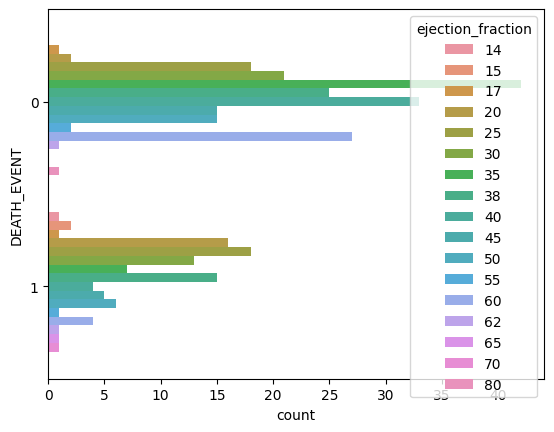

In [8]:
Survived=sns.countplot(y=neural['DEATH_EVENT'], hue='ejection_fraction', data=neural)

In [10]:
##preprocessing
###outliers is recommended after the filling of the missing values!!!!!! so
##firts handle missing value then go for outliers. However !!! 
##sometimes is beneficial to do the reverse order depending of what % of missing values are. 
neural.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [12]:
neural.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [13]:
from sklearn import preprocessing

label_encoder=LabelEncoder()

neural['age']= label_encoder.fit_transform(neural['age'])
neural['sex']= label_encoder.fit_transform(neural['sex'])
neural['anaemia']= label_encoder.fit_transform(neural['anaemia'])
neural['creatinine_phosphokinase']= label_encoder.fit_transform(neural['creatinine_phosphokinase'])
neural['diabetes']= label_encoder.fit_transform(neural['diabetes'])
neural['ejection_fraction']= label_encoder.fit_transform(neural['ejection_fraction'])
neural['high_blood_pressure']= label_encoder.fit_transform(neural['high_blood_pressure'])
neural['platelets']= label_encoder.fit_transform(neural['platelets'])
neural['serum_creatinine']= label_encoder.fit_transform(neural['serum_creatinine'])
neural['serum_sodium']= label_encoder.fit_transform(neural['serum_sodium'])
neural['smoking']= label_encoder.fit_transform(neural['smoking'])
neural['time']= label_encoder.fit_transform(neural['time'])
neural['DEATH_EVENT']= label_encoder.fit_transform(neural['DEATH_EVENT'])

In [14]:
neural.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,34,0,144,0,3,1,93,17,9,1,0,0,1
1,15,0,207,0,7,0,91,7,15,1,0,1,1
2,26,0,66,0,3,0,26,10,8,1,1,2,1
3,10,1,44,0,3,0,49,17,16,1,0,2,1
4,26,1,74,1,3,0,133,24,1,0,0,3,1


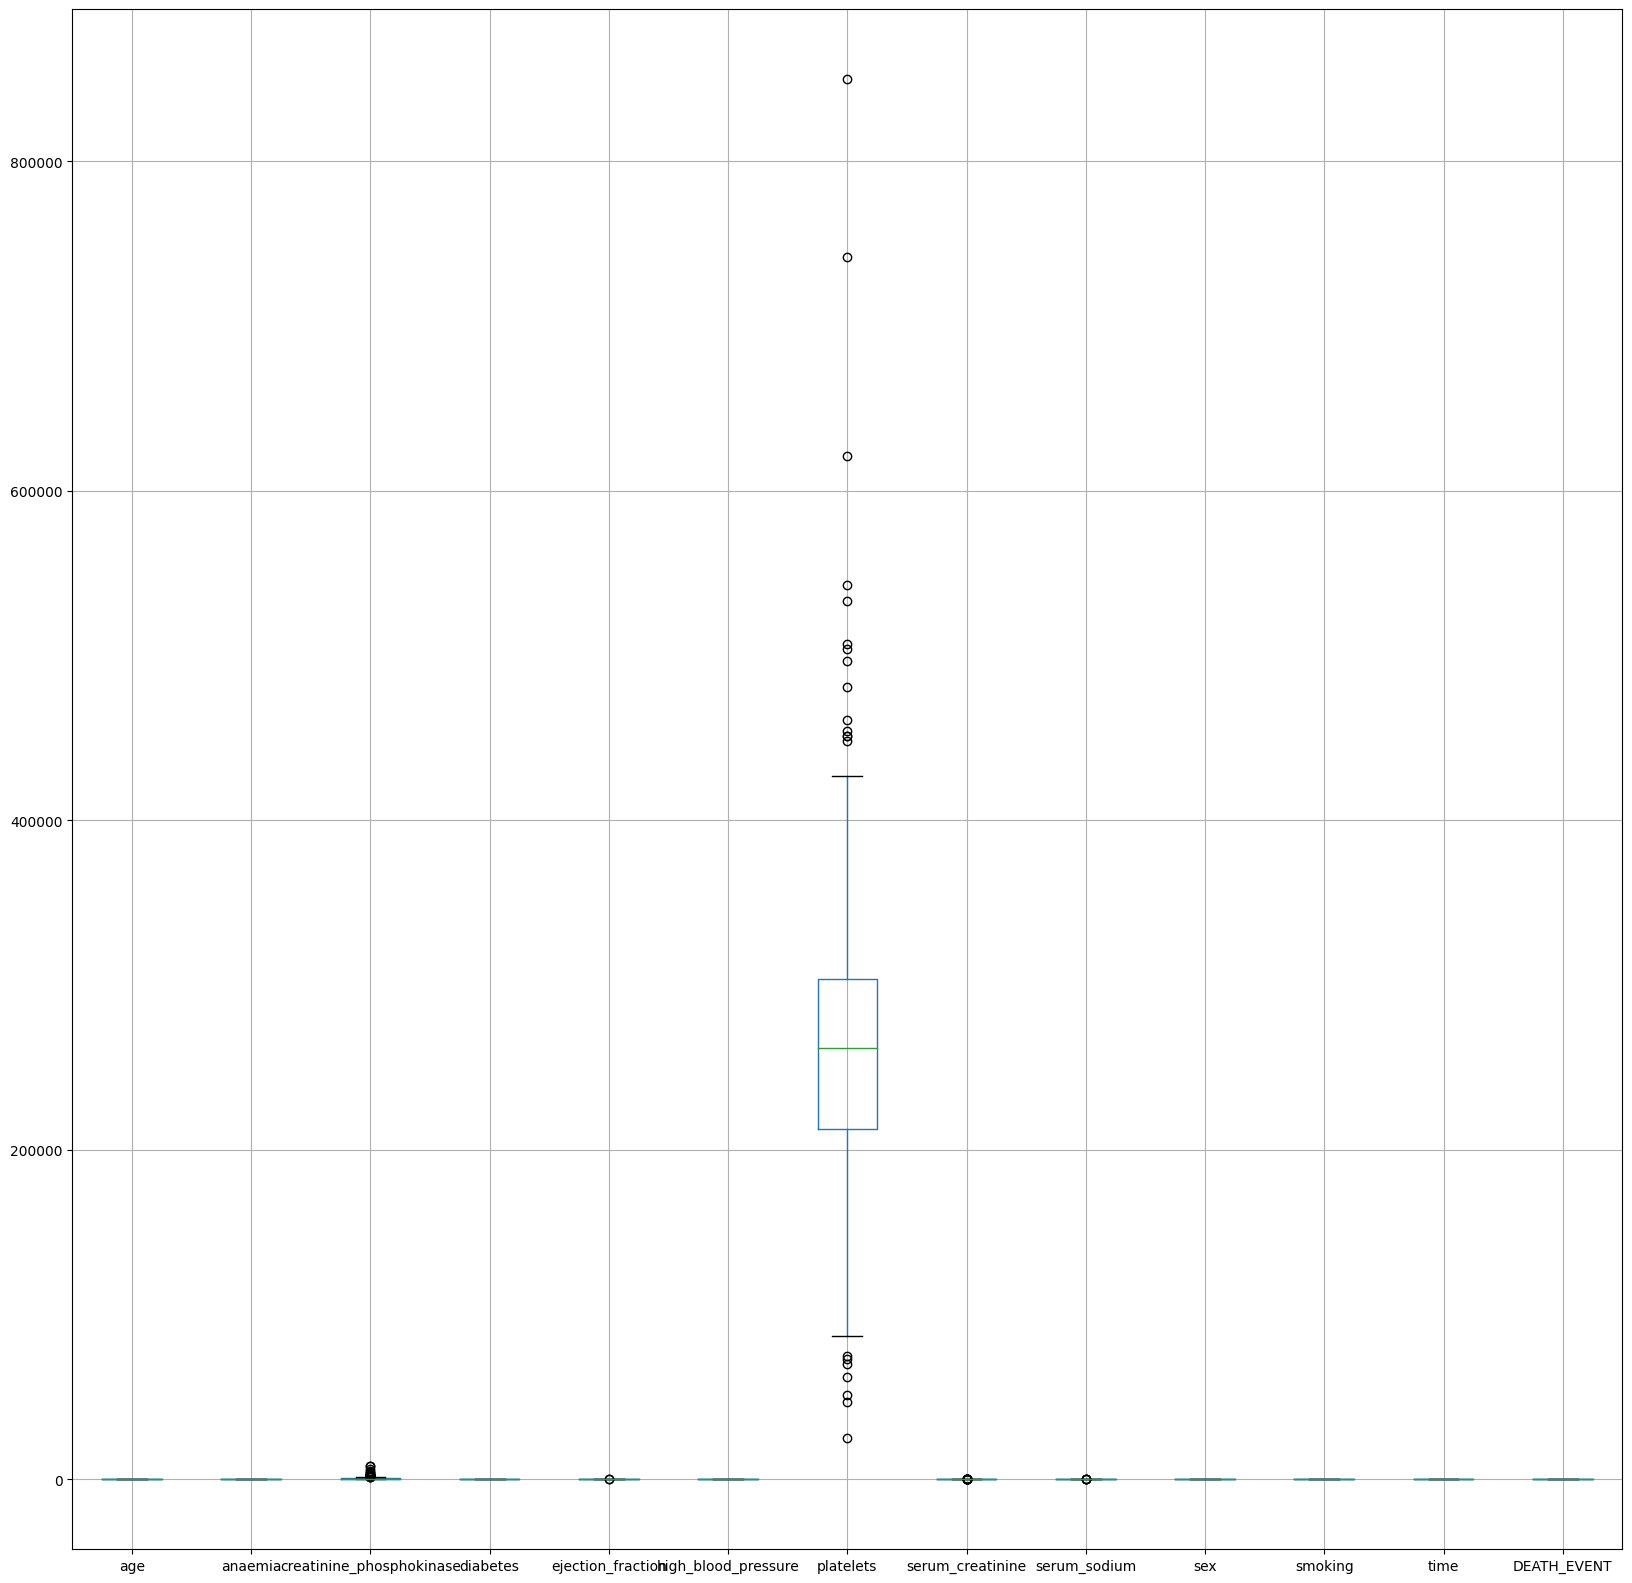

In [18]:

##neural.boxplot(figsize=(20,20))
##plt.show()
##The outliers were changing the result for the neural network, so I decided not to take it into account.
##I am not taking them into account because the results are not really changing and the Neural Network was perfoming worse.

In [ ]:
## removing outliers 
##max_threshold, min_threshold = neural['ejection_fraction'].quantile([0.75,0.25])
##neural_new = neural[(neural.ejection_fraction>min_threshold) & (neural.ejection_fraction<max_threshold)]

In [ ]:
##max_threshold, min_threshold = neural['serum_creatinine'].quantile([0.75,0.25])
##neural_new = neural[(neural.serum_creatinine>min_threshold) & (neural.serum_creatinine<max_threshold)]

In [ ]:
##max_threshold, min_threshold = neural['serum_sodium'].quantile([0.75,0.25])
##neural_new = neural[(neural.serum_sodium>min_threshold) & (neural.serum_sodium<max_threshold)]

In [ ]:
##neural_new.head(5)

In [15]:
neural_norm = normalize(neural)
neural_norm= pd.DataFrame(neural_norm, columns=neural.columns)
neural_norm.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0.193347,0.000000,0.818883,0.000000,0.017060,0.005687,0.528862,0.096674,0.051180,0.005687,0.000000,0.000000,0.005687
1,0.065982,0.000000,0.910552,0.000000,0.030792,0.000000,0.400291,0.030792,0.065982,0.004399,0.000000,0.004399,0.004399
2,0.338836,0.000000,0.860122,0.000000,0.039096,0.000000,0.338836,0.130322,0.104257,0.013032,0.013032,0.026064,0.013032
3,0.141450,0.014145,0.622378,0.000000,0.042435,0.000000,0.693103,0.240464,0.226319,0.014145,0.000000,0.028290,0.014145
4,0.166315,0.006397,0.473358,0.006397,0.019190,0.000000,0.850766,0.153522,0.006397,0.000000,0.000000,0.019190,0.006397


In [16]:
neural.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   age                       299 non-null    int64
 1   anaemia                   299 non-null    int64
 2   creatinine_phosphokinase  299 non-null    int64
 3   diabetes                  299 non-null    int64
 4   ejection_fraction         299 non-null    int64
 5   high_blood_pressure       299 non-null    int64
 6   platelets                 299 non-null    int64
 7   serum_creatinine          299 non-null    int64
 8   serum_sodium              299 non-null    int64
 9   sex                       299 non-null    int64
 10  smoking                   299 non-null    int64
 11  time                      299 non-null    int64
 12  DEATH_EVENT               299 non-null    int64
dtypes: int64(13)
memory usage: 30.5 KB


In [17]:
neural.keys()

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [18]:
##imbalanaced data set. 
neural['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

<AxesSubplot: ylabel='DEATH_EVENT'>

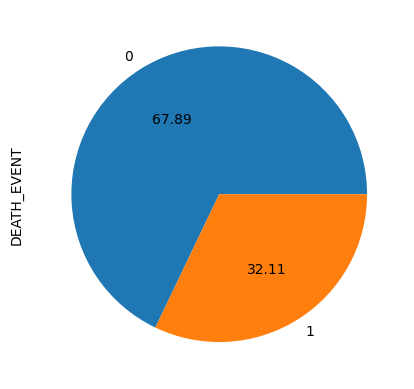

In [19]:
neural['DEATH_EVENT'].value_counts().plot.pie(autopct='%.2f')

In [20]:
##random undersampling(majority high data sample , minority are the ones with the lower data sample)
##majority = minority if we apply undersampling
##oversampling, we want to increase the minority class so that is equal to the majority class. 
##I belive it is better to apply oversampling increasing the minority class otherwise the data may be very small. 

## imblearn.under_sampling import RandomUnderSampler

from imblearn.over_sampling import RandomOverSampler

In [21]:
X=neural.drop(['DEATH_EVENT'], axis=1)
y=neural['DEATH_EVENT']

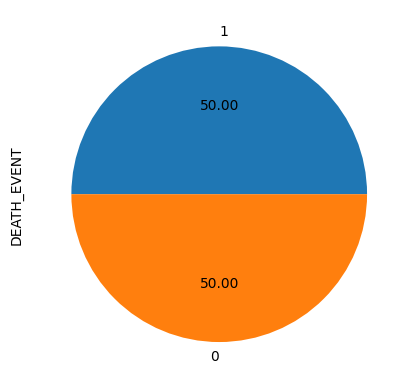

In [22]:
ros = RandomOverSampler(sampling_strategy='not majority')
X_res, y_res =ros.fit_resample(X, y)
ax = y_res.value_counts().plot.pie(autopct='%.2f') 


In [126]:
##y_res.value_counts()

In [ ]:
##split, train and test

In [36]:
## split the data into independent and dependent variable
##X = neural.iloc[:, :-1].values
##y = neural.iloc[:, -1].values


In [23]:
## split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size= 0.2, random_state = 32)

In [24]:
## TRAIN THE LOGISTIC REGRESSION
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)

c:\Users\brill\OneDrive\Desktop\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
##  make the prediction
pred_LR = model_LR.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicted': pred_LR})

,Actual,Predicted
137,0,1
170,0,1
144,1,1
182,1,0
39,1,1
...,...,...
233,0,0
294,0,0
127,0,0
288,0,0


In [26]:
## evaluate the model accuracy
accuracy_LR = accuracy_score(y_test, pred_LR)

## CONFUSION MATRIX
conf_mat = confusion_matrix(y_test, pred_LR)

print(accuracy_LR)
print(conf_mat)


0.8536585365853658
[[32  7]
 [ 5 38]]


In [27]:
pd.DataFrame(confusion_matrix(y_test,pred_LR), columns=['Predicted No', 'Predicted Yes'],index =['Actual No', 'Actual Yes'])

,Predicted No,Predicted Yes
Actual No,32,7
Actual Yes,5,38


In [28]:
##Classification report 
from sklearn.metrics import classification_report

In [29]:
print(classification_report(y_test,pred_LR ))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84        39
           1       0.84      0.88      0.86        43

    accuracy                           0.85        82
   macro avg       0.85      0.85      0.85        82
weighted avg       0.85      0.85      0.85        82



In [135]:
### I tried to get better results using SMOTE but it was worse than doing Overfitting
##from imblearn.over_sampling import SMOTE

In [ ]:
##X_train_smote=neural.drop(['DEATH_EVENT'], axis=1)
##y_train_smote=neural['DEATH_EVENT']
##X_train_smote.shape, y_train_smote.shape

In [ ]:
##model_LR = LogisticRegression()
##model_LR.fit(X_train_smote, y_train_smote)

In [ ]:
##pred_LR = model_LR.predict(X_test)
##pd.DataFrame({'Actual': y_test, 'Predicted': pred_LR})

In [ ]:
##accuracy_LR = accuracy_score(y_test, pred_LR)

## CONFUSION MATRIX
##conf_mat = confusion_matrix(y_test, pred_LR)

##print(accuracy_LR)
##print(conf_mat)

In [84]:
##Classification report 
###from sklearn.metrics import classification_report

In [ ]:
##print(classification_report(y_test,pred_LR ))

In [44]:
###from imblearn.over_sampling import SMOTE


In [45]:
##smote=SMOTE()
##X_train_smote,y_train_smote = smote.fit_resample(X_train.astype('float'), y_train)

In [ ]:
##from collections import Counter
##print('Before SMOTE:', Counter(y_train))
##print('After SMOTE:', Counter(y_train_smote))

In [ ]:
##model_LR = LogisticRegression()
##model_LR.fit(X_train_smote, y_train_smote)

In [ ]:
##pred_LR = model_LR.predict(X_test)
##pd.DataFrame({'Actual': y_test, 'Predicted': pred_LR})

In [ ]:
##accuracy_LR = accuracy_score(y_test, pred_LR)

## CONFUSION MATRIX
##conf_mat = confusion_matrix(y_test, pred_LR)

##print(accuracy_LR)
##print(conf_mat)

In [ ]:
###Neural Network

In [131]:

##simple early stopping
##callback=tf.keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
from tensorflow.keras.callbacks import EarlyStopping
Early_stopping= EarlyStopping(monitor='val_loss',mode='min', patience=4)

####Neural Network
model = Sequential()
##inout layer 
model.add(Dense(units= 14, kernel_initializer= 'uniform', activation = 'relu', input_dim = 12))
##hidden layers
model.add(Dense(units= 13, kernel_initializer= 'uniform', activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units= 13, kernel_initializer= 'uniform', activation = 'relu'))
model.add(Dropout(0.2))
##output layers 
model.add(Dense(units= 1, kernel_initializer= 'uniform', activation = 'sigmoid'))
### compile
model.compile(optimizer = 'adam', loss ='binary_crossentropy', metrics = ['accuracy'])



In [136]:

history = model.fit(X_res, y_res, batch_size = 10, epochs = 50, validation_data=(X_test, y_test),callbacks=[Early_stopping])

Epoch 1/50
41/41 [==============================] - 1s 20ms/step - loss: 0.3182 - accuracy: 0.8941 - val_loss: 0.2855 - val_accuracy: 0.9146
Epoch 2/50
41/41 [==============================] - 0s 12ms/step - loss: 0.2979 - accuracy: 0.8990 - val_loss: 0.2938 - val_accuracy: 0.8902
Epoch 3/50
41/41 [==============================] - 1s 18ms/step - loss: 0.3028 - accuracy: 0.8842 - val_loss: 0.2894 - val_accuracy: 0.9024
Epoch 4/50
41/41 [==============================] - 0s 11ms/step - loss: 0.3234 - accuracy: 0.8842 - val_loss: 0.3069 - val_accuracy: 0.8902
Epoch 5/50
41/41 [==============================] - 1s 22ms/step - loss: 0.3005 - accuracy: 0.8916 - val_loss: 0.2881 - val_accuracy: 0.8902


In [137]:
## make prediction
y_pred_ann = model.predict(X_test)
y_pred_ann = np.where(y_pred_ann > 0.5, 1, 0)

3/3 [==============================] - 0s 7ms/step


In [138]:
print(y_test.shape)
print(y_pred_ann.shape)

(82,)
(82, 1)


In [139]:
y_pred_ann = y_pred_ann.flatten()

In [140]:
print(y_test.shape)
print(y_pred_ann.shape)

(82,)
(82,)


In [145]:
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_ann})

,Actual,Predicted
137,0,1
170,0,0
144,1,1
182,1,0
39,1,1
...,...,...
233,0,0
294,0,0
127,0,0
288,0,0


In [141]:
##classification report
print(classification_report(y_test, y_pred_ann))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        39
           1       0.90      0.88      0.89        43

    accuracy                           0.89        82
   macro avg       0.89      0.89      0.89        82
weighted avg       0.89      0.89      0.89        82



In [127]:
cm = confusion_matrix(y_test, y_pred_ann)
cm

array([[34,  5],
       [ 4, 39]], dtype=int64)

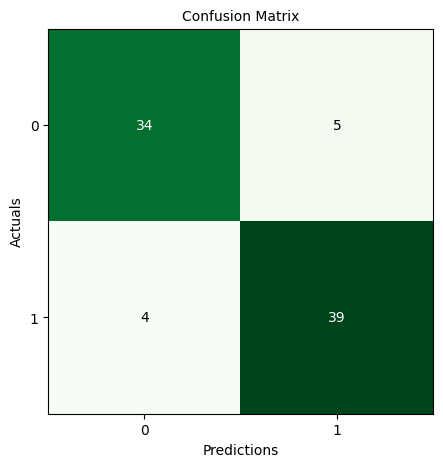

In [146]:
## plot a confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(5, 5), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize = 10)
plt.title('Confusion Matrix', fontsize = 10)
plt.show()

In [147]:
auc = roc_auc_score(y_test, y_pred_ann)
print('AUC: %f' %auc)

AUC: 0.890578


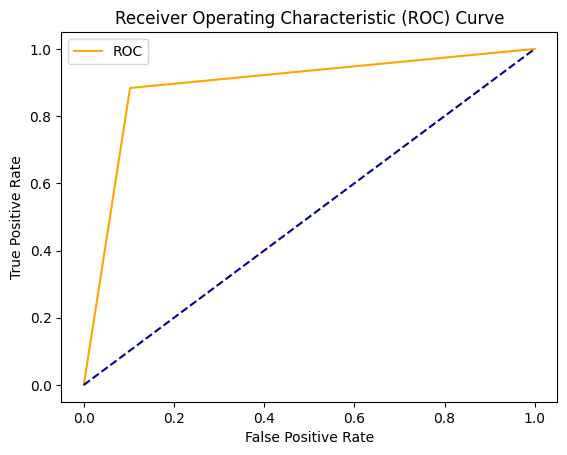

In [148]:
fpr, tpr = roc_curve(y_test, y_pred_ann)[0:2]

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

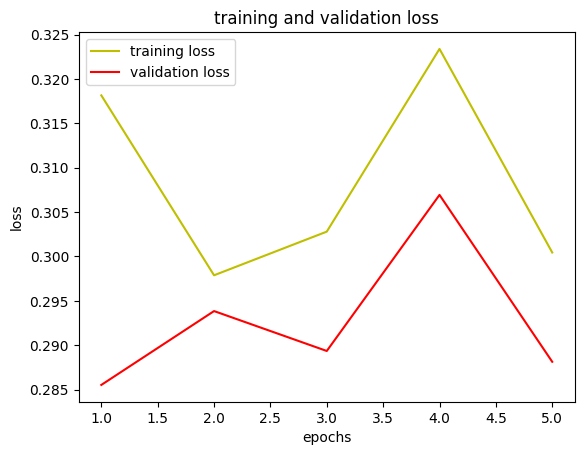

In [142]:
loss=history.history['loss']
val_loss = history.history['val_loss']
epochs= range(1,len(loss)+1)
plt.plot(epochs,loss,'y', label='training loss')
plt.plot(epochs, val_loss, 'r', label='validation loss')
plt.title('training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()
##validation loss below the training loss. Usually, our training should be better.
##The lines indicate that the training data is harder to model than the validation.
##The yellow line is up and down due to the dropout because we have limited data.
##Probably we can try with 0.5 dropout.
##During the training process we use dropout, we dont use it during the validation process.Thus,  this is the reason why our training line is above the validation line.
##During the training process 0.2 (dropout) are set to zero(neurons)because they are dropped, then we  only  use 80%.
##During the testing all the neurons are used. The model during testing is more robust than during training so it leads to higher testing accuracy.
##We consider the model is acceptable. Also both lines are following the same direction;however, it can be a problem of overfitting.
##When the validation model diverge then we can say that there is overfitting. 
##overfitting: validation error is higher than the training error. 
##Underfitting: model cannot learn from the training data(we need more training data or the training data is complex). Both, validation and training error are high. 
##Be careful when our dropout is too high. 
##In our case we do not have overfitting but both have some space in between. 


In [ ]:
####Goal of DL is to minimize loss (loss reflects the error between the prediction and the ground truth)
##Accuracy=quality of model during training.
##On the graph our model quality is improving as the lines are increasing. 
##Our training curve is more than 0.8 which indicates our model is performing not perfect but ok.
## It seems that the training and validation accuracy do not have a wide difference. 
###However, the model would need some improvement. Both lines are converging but they is still a difference between the lines. 
##At some point our validation accuracy is over training accuracy. 
##There are 2 indicators: overfitting or that the data is too small. 
##I believe there is not overfitting but the data is small.  

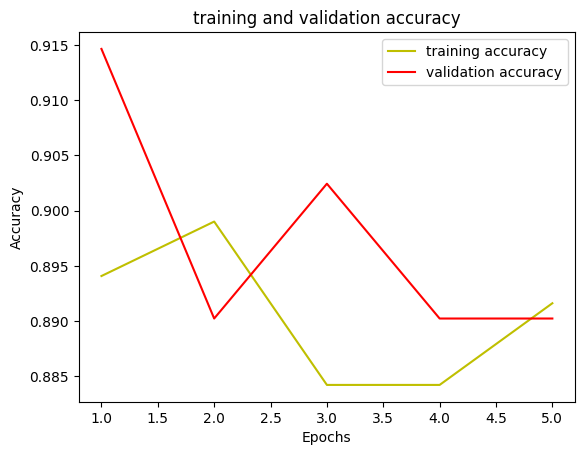

In [143]:
## training and validation data graph
accur= history.history['accuracy']
val_accur=history.history['val_accuracy']
plt.plot(epochs,accur,'y', label='training accuracy')
plt.plot(epochs, val_accur, 'r', label='validation accuracy')s
plt.title('training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
##SVM

In [47]:
## SVM
#Create a SVM Classifier
clfLinear = svm.SVC(kernel='linear')
clfsigmoid = svm.SVC(kernel='sigmoid') 


In [48]:
#Train the model using the training sets
clfLinear.fit(X_train, y_train)
clfsigmoid.fit(X_train, y_train)


SVC(kernel='sigmoid')

In [49]:
#Predict the response for test dataset
y_pred_linear = clfLinear.predict(X_test)
y_pred_sigmoid = clfsigmoid.predict(X_test)


In [50]:
## make a dataframe prediction for linear kernel
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_sigmoid})

,Actual,Predicted
137,0,1
170,0,1
144,1,1
182,1,1
39,1,1
...,...,...
233,0,1
294,0,0
127,0,0
288,0,1


In [51]:
print("Sigmoid kernel Accuracy:",metrics.accuracy_score(y_test, y_pred_sigmoid))

Sigmoid kernel Accuracy: 0.47560975609756095


In [52]:
auc = roc_auc_score(y_test, y_pred_sigmoid)
print('AUC: %f' %auc)

AUC: 0.476148


In [53]:
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_linear})

,Actual,Predicted
137,0,1
170,0,1
144,1,1
182,1,0
39,1,1
...,...,...
233,0,0
294,0,0
127,0,0
288,0,0


In [144]:
auc = roc_auc_score(y_test, y_pred_linear)
print('AUC: %f' %auc)

NameError: name 'y_pred_linear' is not defined

In [149]:
#### Neural Network deployment 
##save the ann model
model.save('ann_model')

2023-02-25 22:45:30.400 WARNING absl: Found untraced functions such as _update_step_xla while saving (showing 1 of 1). These functions will not be directly callable after loading.


INFO:tensorflow:Assets written to: ann_model\assets


2023-02-25 22:45:34.103 INFO    tensorflow: Assets written to: ann_model\assets


In [ ]:
import pickle
##save the model to a file 
with open('logistic_regression_model.pkl', 'wb') as file: 
        pickle.dump(model_LR, file)